<h1>Regressão Linear Multipla</h1>

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from IPython.display import Image

In [2]:
df = pd.read_csv("dataset/diabetes-dataset.csv")
df = df.dropna()
df.head(-10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1
1986,6,104,74,18,156,29.9,0.722,41,1
1987,3,148,66,25,0,32.5,0.256,22,0
1988,4,120,68,0,0,29.6,0.709,34,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<h2>Aplicação da Regressão Linear com todas as características</h2>

<h3>Variaveis independentes: Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome </h3>
<h3>Variável dependente: Glucose</h3>

In [4]:
X = (df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]).to_numpy()
y = (df[["Glucose"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 8)
y shape:  (2000,)


In [5]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
R2 = r2_score(y, y_pred)
print('R2 score:', R2)

R2 score: 0.33434011269784947


In [6]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [-0.5972827   0.07730192 -0.27501631  0.09386336  0.339727    0.78349662
  0.54075702 24.85421902]
Intercept:  78.5741470627207


In [7]:
X_df = df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]
y_df = df[["Glucose"]]
X_df = sm.add_constant(X_df)
est = sm.OLS(y_df, X_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          6.94e-170
Time:                        13:09:02   Log-Likelihood:                -9366.2
No. Observations:                2000   AIC:                         1.875e+04
Df Residuals:                    1991   BIC:                         1.880e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       78.5741      3.203     24.529      0.000      72.292      84.856
Pregnancies                 -0.5973      0.213     -2.803      0.005      -1.015      -0.179
BloodPressure                0.0773      0.033      2.330      0.020       0.012       0.142
SkinThickness               -0.2750      0.044     -6.234      0.000      -0.362      -0.189
Insulin                      0.0939      0.006     15.661      0.000       0.082       0.106
BMI                          0.3397      0.083      4.072      0.000       0.176       0.503
DiabetesPedigreeFunction     0.7835      1.878      0.417      0.677      -2.899       4.466
Age                          0.5408      0.062      8.789      0.000       0.420       0.661
Outcome                     24.8542      1.354     18.360      0.000      22.199      27.509
==============================================================================
Omnibus:                      112.642   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.272
Skew:                          -0.183   Prob(JB):                     1.61e-83
Kurtosis:                       5.108   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

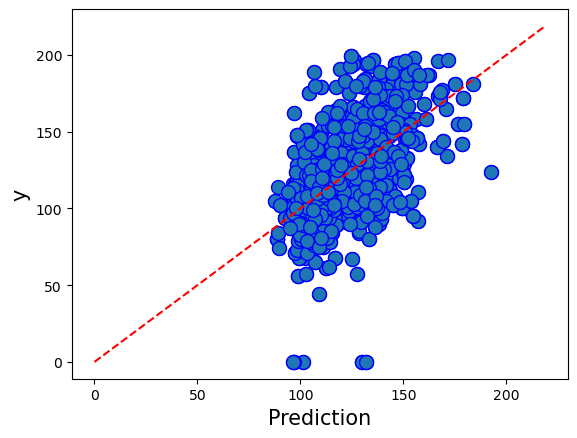

In [8]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

<h1>Aplicação da Regressão Linear sem a variável de maior p-valor: "DiabetesPedigreeFunction"</h1>

<h3>Variaveis independentes: Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, Age, Outcome </h3>
<h3>Variável dependente: Glucose</h3>

In [9]:
X = (df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome"]]).to_numpy()
y = (df[["Glucose"]]).to_numpy()
y = y.ravel()
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 7)
y shape:  (2000,)


In [10]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
R2 = r2_score(y, y_pred)
print('R2 score:', R2)

R2 score: 0.3342819173419348


In [11]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [-0.60249413  0.07732003 -0.27333832  0.09414676  0.34031942  0.54191986
 24.92335992]
Intercept:  78.82209678584942


In [12]:
X_df = df[["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome"]]
y_df = df[["Glucose"]]
X_df = sm.add_constant(X_df)
est = sm.OLS(y_df, X_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          6.10e-171
Time:                        13:09:02   Log-Likelihood:                -9366.2
No. Observations:                2000   AIC:                         1.875e+04
Df Residuals:                    1992   BIC:                         1.879e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            78.8221      3.147     25.046      0.000      72.650      84.994
Pregnancies      -0.6025      0.213     -2.833      0.005      -1.020      -0.185
BloodPressure     0.0773      0.033      2.331      0.020       0.012       0.142
SkinThickness    -0.2733      0.044     -6.223      0.000      -0.359      -0.187
Insulin           0.0941      0.006     15.814      0.000       0.082       0.106
BMI               0.3403      0.083      4.081      0.000       0.177       0.504
Age               0.5419      0.061      8.819      0.000       0.421       0.662
Outcome          24.9234      1.343     18.554      0.000      22.289      27.558
==============================================================================
Omnibus:                      112.849   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.870
Skew:                          -0.181   Prob(JB):                     4.40e-84
Kurtosis:                       5.116   Cond. No.                         806.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

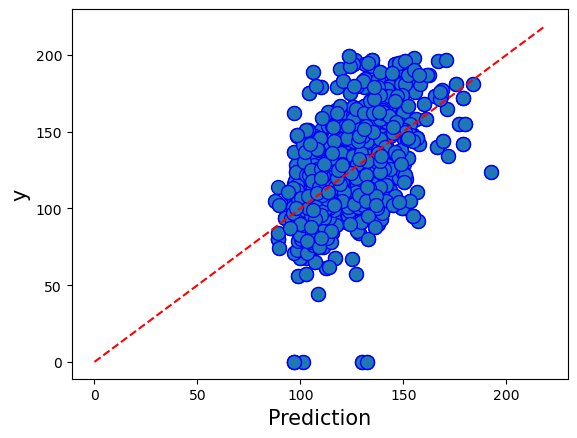

In [13]:
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

<h1>Regressão Logística Múltipla</h1>

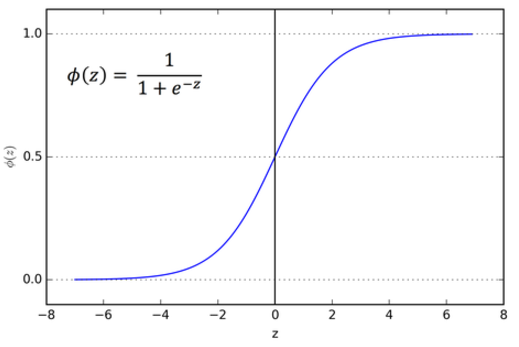

In [14]:
Image(filename="sigmoid_function.png")

In [15]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [16]:
df = pd.read_csv("dataset/diabetes-dataset.csv")
df = df.dropna()
df.head(-10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1985,0,131,88,0,0,31.6,0.743,32,1
1986,6,104,74,18,156,29.9,0.722,41,1
1987,3,148,66,25,0,32.5,0.256,22,0
1988,4,120,68,0,0,29.6,0.709,34,0


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<h2>Aplicação da Regressão Logiística multipla com todas as características</h2>

<h3>Variaveis independentes: Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome </h3>
<h3>Variável dependente: Outcome (se é diabético ou não)</h3>

In [18]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).to_numpy()
y = (df[["Outcome"]]).to_numpy()
y = y.ravel() #transforma a matrix (n,1) para um array (n,)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 8)
y shape:  (2000,)


In [19]:
model = LogisticRegression(tol = 0.0 ,max_iter = 10000)
model.fit(X,y)
y_pred = model.predict(X)
print("Porcentagem de acerto: %.2f %%" % (100*model.score(X, y))) #Porcentagem de acertos

Porcentagem de acerto: 78.30 %


In [20]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [ 1.26261896e-01  3.37091715e-02 -9.63862385e-03  5.63576030e-04
 -1.23414441e-03  7.75581059e-02  8.59220936e-01  1.29520603e-02]
Intercept:  [-8.01358966]


In [21]:
X_df = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y_df = df[["Outcome"]]
X_df = sm.add_constant(X_df)
est = sm.Logit(y_df, X_df).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.478583
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1991
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.2550
Time:                        13:09:02   Log-Likelihood:                -957.17
converged:                       True   LL-Null:                       -1284.7
Covariance Type:            nonrobust   LLR p-value:                3.333e-136
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.0265      0.431    -18.639      0.000      -8.870      -7.182
Pregnancies                  0.1264      0.020      6.319      0.000       0.087       0.166
Glucose                      0.0337      0.002     15.150      0.000       0.029       0.038
BloodPressure               -0.0096      0.003     -2.973      0.003      -0.016      -0.003
SkinThickness                0.0005      0.004      0.123      0.902      -0.008       0.009
Insulin                     -0.0012      0.001     -2.148      0.032      -0.002      -0.000
BMI                          0.0776      0.009      8.732      0.000       0.060       0.095
DiabetesPedigreeFunction     0.8878      0.186      4.772      0.000       0.523       1.252
Age                          0.0129      0.006      2.270      0.023       0.002       0.024
============================================================================================
"""

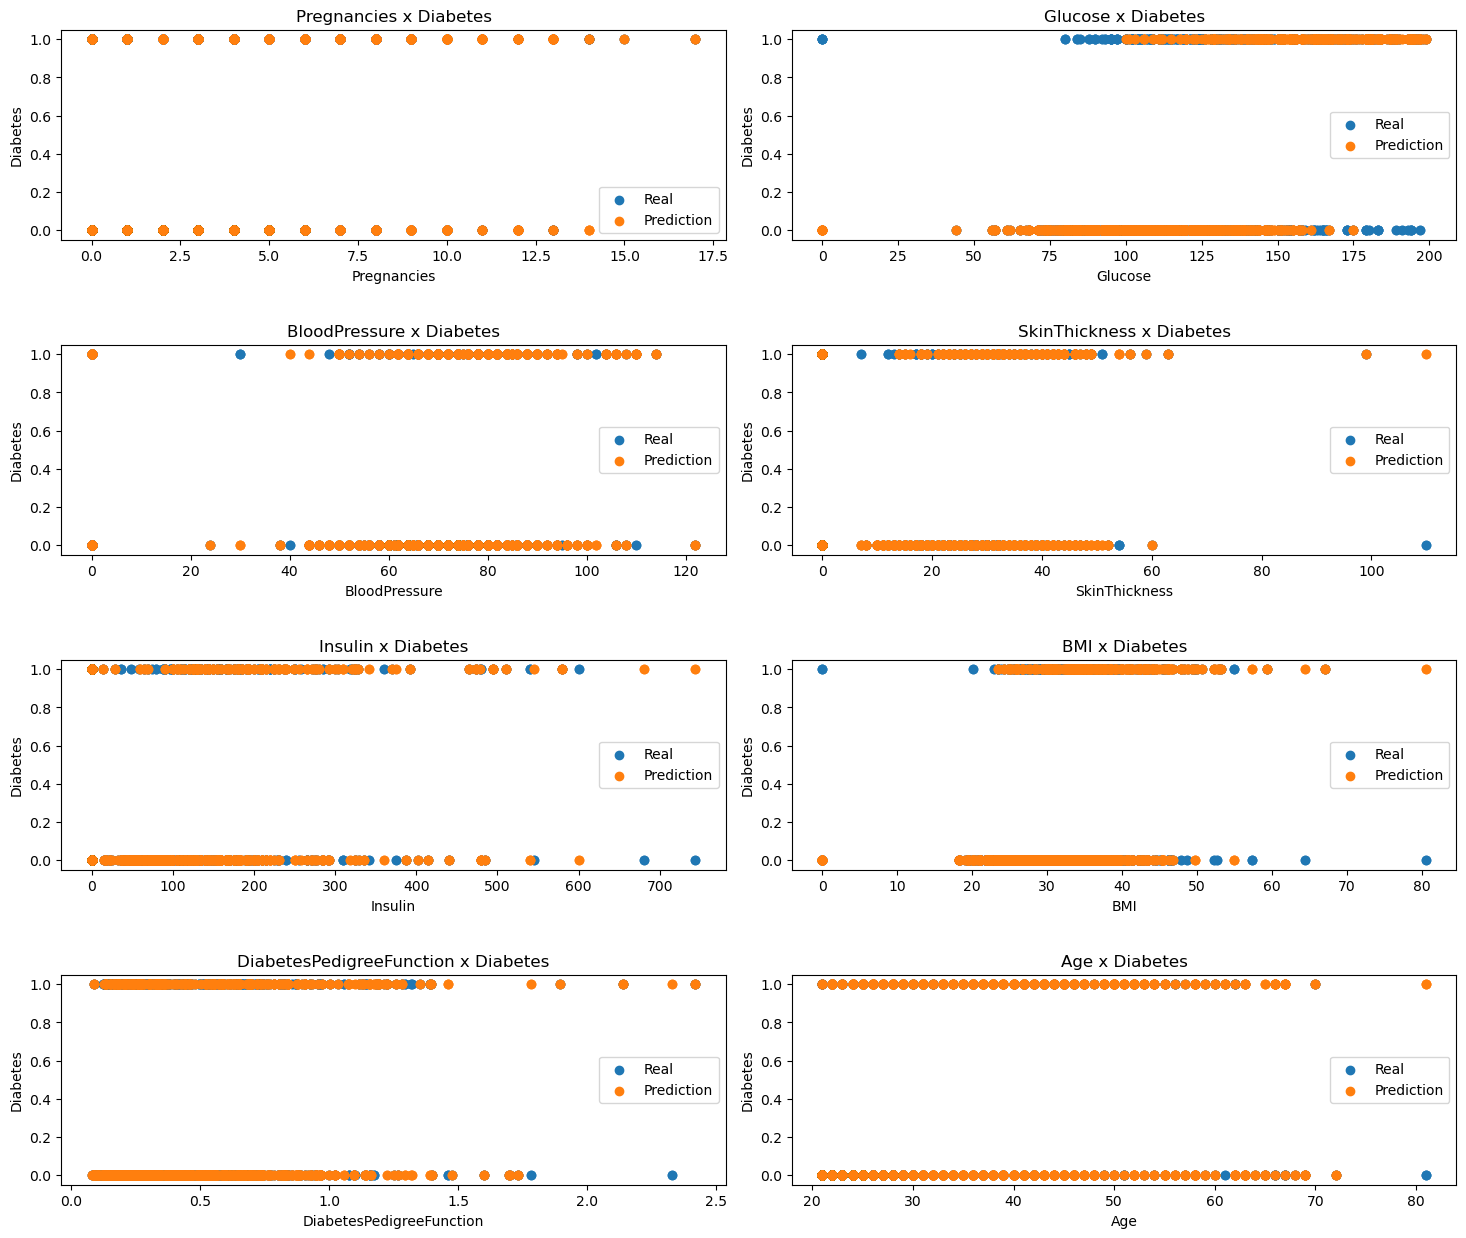

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X[:,0],y, label = "Real")
axs[0, 0].scatter(X[:,0],y_pred, label = "Prediction")
axs[0, 0].set_title('Pregnancies x Diabetes')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Diabetes")
axs[0,0].legend()

axs[0, 1].scatter(X[:,1],y, label = "Real")
axs[0, 1].scatter(X[:,1],y_pred, label = "Prediction")
axs[0, 1].set_title('Glucose x Diabetes')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Diabetes")
axs[0,1].legend()

axs[1, 0].scatter(X[:,2],y, label = "Real")
axs[1, 0].scatter(X[:,2],y_pred, label = "Prediction")
axs[1, 0].set_title('BloodPressure x Diabetes')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Diabetes")
axs[1,0].legend()

axs[1, 1].scatter(X[:,3],y, label = "Real")
axs[1, 1].scatter(X[:,3],y_pred, label = "Prediction")
axs[1, 1].set_title('SkinThickness x Diabetes')
axs[1, 1].set_xlabel("SkinThickness")
axs[1, 1].set_ylabel("Diabetes")
axs[1,1].legend()

axs[2, 0].scatter(X[:,4],y, label = "Real")
axs[2, 0].scatter(X[:,4],y_pred, label = "Prediction")
axs[2, 0].set_title('Insulin x Diabetes')
axs[2, 0].set_xlabel("Insulin")
axs[2, 0].set_ylabel("Diabetes")
axs[2,0].legend()

axs[2, 1].scatter(X[:,5],y, label = "Real")
axs[2, 1].scatter(X[:,5],y_pred, label = "Prediction")
axs[2, 1].set_title('BMI x Diabetes')
axs[2, 1].set_xlabel("BMI")
axs[2, 1].set_ylabel("Diabetes")
axs[2,1].legend()

axs[3, 0].scatter(X[:,6],y, label = "Real")
axs[3, 0].scatter(X[:,6],y_pred, label = "Prediction")
axs[3, 0].set_title('DiabetesPedigreeFunction x Diabetes')
axs[3, 0].set_xlabel("DiabetesPedigreeFunction")
axs[3, 0].set_ylabel("Diabetes")
axs[3,0].legend()

axs[3, 1].scatter(X[:,7],y, label = "Real")
axs[3, 1].scatter(X[:,7],y_pred, label = "Prediction")
axs[3, 1].set_title('Age x Diabetes')
axs[3, 1].set_xlabel("Age")
axs[3, 1].set_ylabel("Diabetes")
axs[3,1].legend()

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

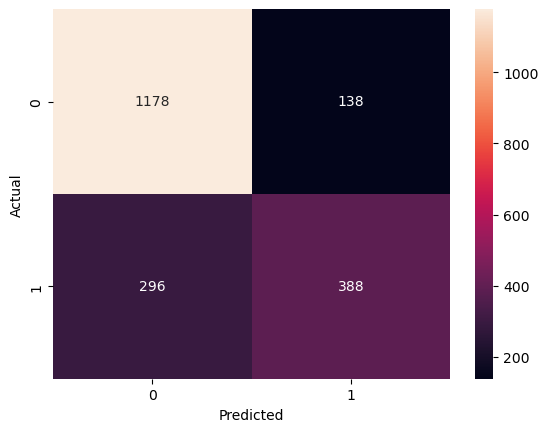

In [23]:
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h2>Aplicação da Regressão Logiística multipla sem a variável de maior p-valor: "SkinThickness"</h2>

<h3>Variaveis independentes: Pregnancies, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome </h3>
<h3>Variável dependente: Outcome (se é diabético ou não)</h3>

In [24]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).to_numpy()
y = (df[["Outcome"]]).to_numpy()
y = y.ravel() #transforma a matrix (n,1) para um array (n,)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2000, 7)
y shape:  (2000,)


In [25]:
model = LogisticRegression(tol = 0.0 ,max_iter = 10000)
model.fit(X,y)
y_pred = model.predict(X)
print("Porcentagem de acerto: %.2f %%" % (100*model.score(X, y))) #Porcentagem de acertos

Porcentagem de acerto: 78.30 %


In [26]:
coef = model.coef_
coef = coef.ravel()
intercept = model.intercept_

print("Coeficientes: ", coef)
print("Intercept: ", intercept)

Coeficientes:  [ 0.12615712  0.03365168 -0.00957466 -0.00119949  0.0778785   0.85990112
  0.01292999]
Intercept:  [-8.01151565]


In [27]:
X_df = df[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "DiabetesPedigreeFunction", "Age"]]
y_df = df[["Outcome"]]
X_df = sm.add_constant(X_df)
est = sm.Logit(y_df, X_df).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.502401
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.2179
Time:                        13:09:03   Log-Likelihood:                -1004.8
converged:                       True   LL-Null:                       -1284.7
Covariance Type:            nonrobust   LLR p-value:                1.085e-117
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.0715      0.338    -17.966      0.000      -6.734      -5.409
Pregnancies                  0.1203      0.019      6.285      0.000       0.083       0.158
Glucose                      0.0358      0.002     16.402      0.000       0.031       0.040
BloodPressure               -0.0029      0.003     -0.981      0.326      -0.009       0.003
Insulin                     -0.0005      0.001     -1.064      0.287      -0.002       0.000
DiabetesPedigreeFunction     0.9292      0.176      5.284      0.000       0.585       1.274
Age                          0.0079      0.005      1.433      0.152      -0.003       0.019
============================================================================================
"""

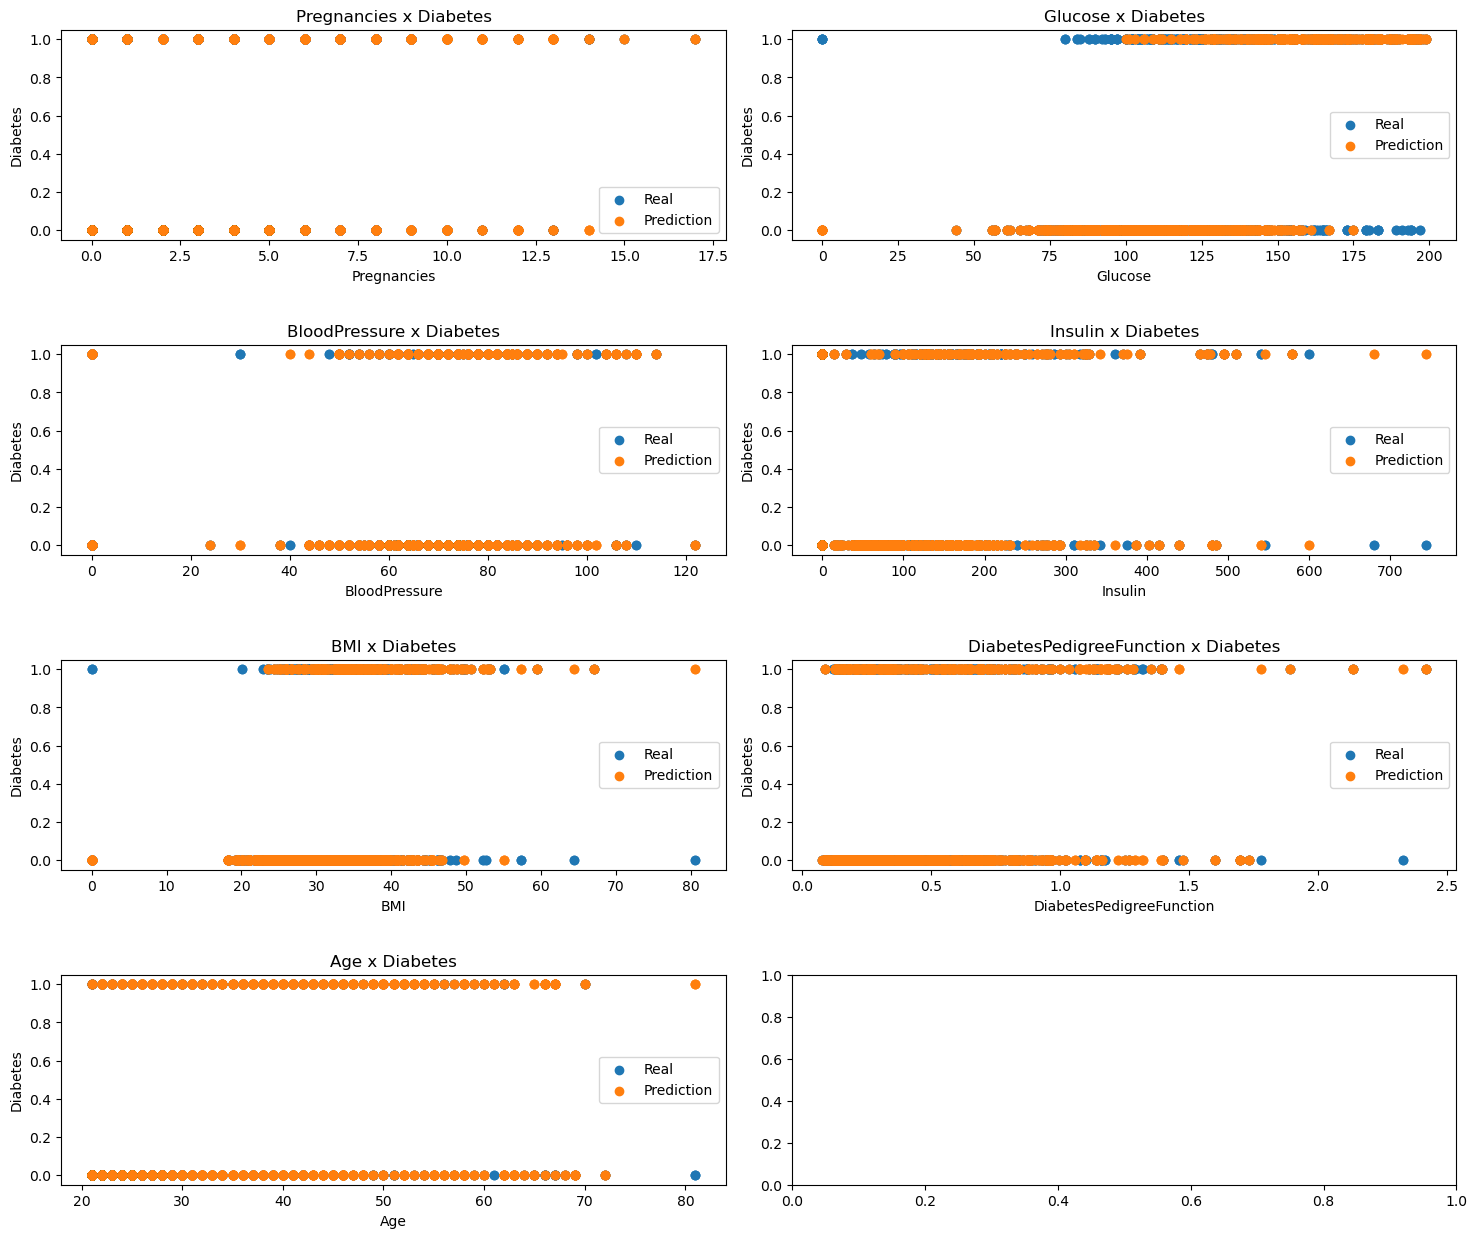

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X[:,0],y, label = "Real")
axs[0, 0].scatter(X[:,0],y_pred, label = "Prediction")
axs[0, 0].set_title('Pregnancies x Diabetes')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Diabetes")
axs[0,0].legend()

axs[0, 1].scatter(X[:,1],y, label = "Real")
axs[0, 1].scatter(X[:,1],y_pred, label = "Prediction")
axs[0, 1].set_title('Glucose x Diabetes')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Diabetes")
axs[0,1].legend()

axs[1, 0].scatter(X[:,2],y, label = "Real")
axs[1, 0].scatter(X[:,2],y_pred, label = "Prediction")
axs[1, 0].set_title('BloodPressure x Diabetes')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Diabetes")
axs[1,0].legend()

axs[1,1].scatter(X[:,3],y, label = "Real")
axs[1,1].scatter(X[:,3],y_pred, label = "Prediction")
axs[1,1].set_title('Insulin x Diabetes')
axs[1,1].set_xlabel("Insulin")
axs[1,1].set_ylabel("Diabetes")
axs[1,1].legend()

axs[2, 0].scatter(X[:,4],y, label = "Real")
axs[2, 0].scatter(X[:,4],y_pred, label = "Prediction")
axs[2, 0].set_title('BMI x Diabetes')
axs[2, 0].set_xlabel("BMI")
axs[2, 0].set_ylabel("Diabetes")
axs[2, 0].legend()

axs[2,1].scatter(X[:,5],y, label = "Real")
axs[2,1].scatter(X[:,5],y_pred, label = "Prediction")
axs[2,1].set_title('DiabetesPedigreeFunction x Diabetes')
axs[2,1].set_xlabel("DiabetesPedigreeFunction")
axs[2,1].set_ylabel("Diabetes")
axs[2,1].legend()

axs[3, 0].scatter(X[:,6],y, label = "Real")
axs[3, 0].scatter(X[:,6],y_pred, label = "Prediction")
axs[3, 0].set_title('Age x Diabetes')
axs[3, 0].set_xlabel("Age")
axs[3, 0].set_ylabel("Diabetes")
axs[3, 0].legend()

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

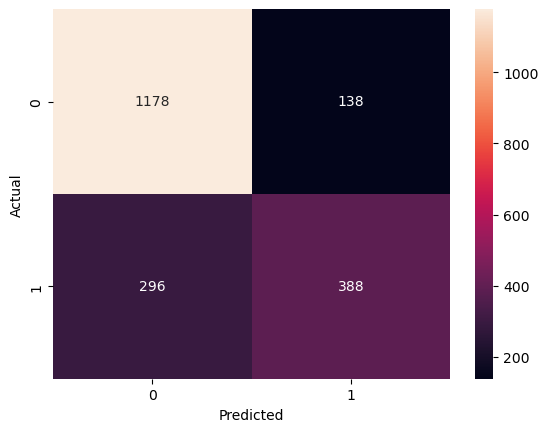

In [29]:
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()